<a href="https://colab.research.google.com/github/ljzier/ST-554-repo/blob/main/ST_554_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linda Zier**

ST 554 - HW #4

**Task 1**

This data has many categorical variables and a few numeric. You should add the following:

**Categorical variables**

• Create a stacked bar graph and a side-by-side bar graph. Give relevant x and y labels, and a title for
the plots.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in student data
stud_data = pd.read_csv("https://www4.stat.ncsu.edu/online/datasets/StudentData.txt", sep=";")
stud_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
# sex is first categorical data
stud_data["sexC"]=stud_data.sex.astype("category")
stud_data.sexC = stud_data.sexC.cat.rename_categories(["Female", "Male"])
#stud_data.sexC.value_counts()

# studytime is second categorical data
stud_data["studytimeC"]=stud_data.studytime.astype("category")
stud_data.studytimeC = stud_data.studytimeC.cat.rename_categories(["<2hrs", "2-5hrs", "5-10hrs", ">10hrs"])

# Ptatus is third categorical data
stud_data["PstatusC"]=stud_data.Pstatus.astype("category")
stud_data.PstatusC = stud_data.PstatusC.cat.rename_categories(["Together", "Apart"])
#stud_data.PstatusC.value_counts()



In [ ]:
# creating a 2-way contingency table with sex and hours studying
stack_table = pd.crosstab(
    stud_data.sexC,
    stud_data.studytimeC,
    margins=True
)

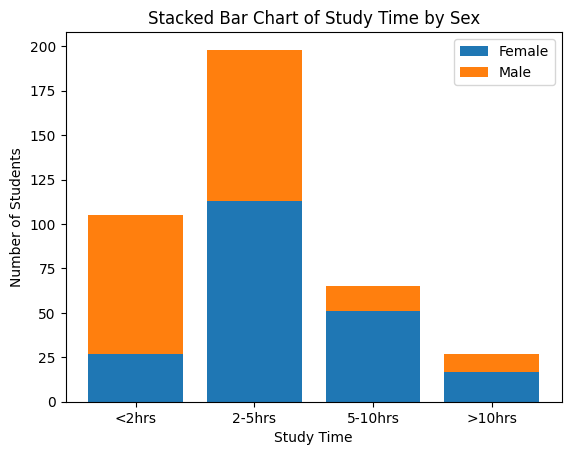

In [ ]:
# creating a stacked bar chart
plt.bar(
  x = stud_data.studytimeC.cat.categories,
  height = stack_table.loc["Female", stud_data.studytimeC.cat.categories],
  label = "Female")
plt.bar(
  x = stud_data.studytimeC.cat.categories,
  height = stack_table.loc["Male", stud_data.studytimeC.cat.categories],
  bottom = stack_table.loc["Female", stud_data.studytimeC.cat.categories],
  label = "Male"
)
plt.xlabel("Study Time")
plt.ylabel("Number of Students")
plt.title("Stacked Bar Chart of Study Time by Sex")
plt.legend()
plt.show()

**What's interesting:**
This plot is interesting because it shows that maale students study less than female students. (or at least report that they study less).

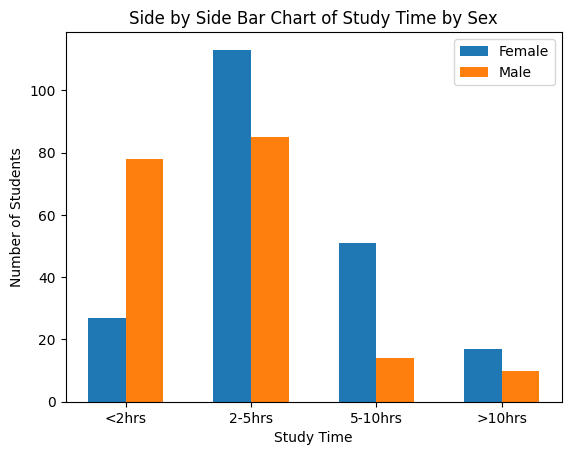

In [ ]:
#creating a side by side bar chart

bar_width = 0.3
index = [1, 2, 3, 4]

plt.bar(
  x = [i - bar_width/2 for i in index], # Adjust x position for female bars
  height = stack_table.loc["Female", stud_data.studytimeC.cat.categories],
  width = bar_width,
  label = "Female")

plt.bar(
  x = [i + bar_width/2 for i in index], # Adjust x position for male bars
  height = stack_table.loc["Male", stud_data.studytimeC.cat.categories],
  width = bar_width,
  label = "Male")

plt.xlabel("Study Time")
plt.ylabel("Number of Students")
plt.title("Side by Side Bar Chart of Study Time by Sex")
plt.xticks(index, stud_data.studytimeC.cat.categories) # Set x-axis labels at the center of each group
plt.legend()
plt.show()

**What's interesting:**
This plot is interesting because it shows that male students study less than female students. (or at least report that they study less). It is much easier to interpret than the stacked chart in my opinion.


**Numeric variables (and across groups)**

The numeric variables are age, absences, and the three test grades variables (G1, G2, and G3).

• Create a histogram, kernel density plot, and boxplot for two of the numeric variables across one of the
categorical variables (that is, create graphs that can compare the distributions across the groups). For
at least one of the kernel density plots across groups, make sure that the graphs are overlayed on the
same plot. Add appropriate labels and titles.
a categorical variable in each. Add appropriate labels and titles.

**After each summary or graph, you should discuss what is interesting about it or what it tells
you!**


[Text(0.5, 0, 'Grade')]

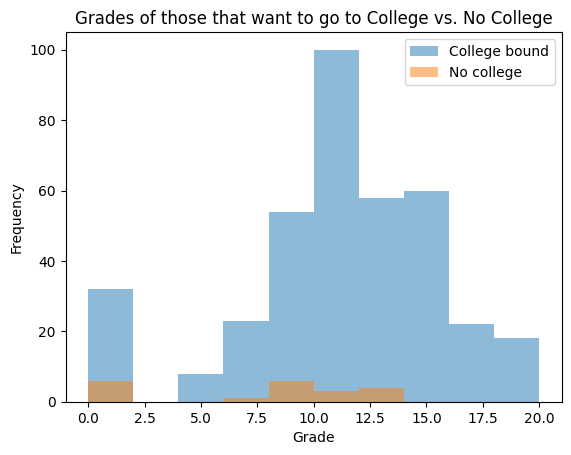

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##   Create a histogram for grades vs. college desire
# manually specify bins
bin_ends = 20
bins = [i*max(stud_data.G3)/bin_ends for i in range(0, bin_ends +1)]

# subsetting on those that want to go to college
grade_college = stud_data.loc[stud_data['higher'] =="yes", "G3"]
grade_nocollege = stud_data.loc[stud_data['higher'] =="no", "G3"]
#len(grade_college)
#len(grade_nocollege)

#correcting for numbers mismatch
grade_nocollege = pd.concat([grade_nocollege, pd.Series([np.nan for _ in range(355)])])
len(grade_college)
len(grade_nocollege)

# print(stud_data.address)
# zip together now that the same length
plotting_df = pd.DataFrame(zip(grade_college, grade_nocollege),
                      columns = ["College bound", "No college"])

# plotting
plotting_df.plot.hist(alpha = 0.5, title = "Grades of those that want to go to College vs. No College") \
    .set(xlabel = "Grade")

**What's interesting:**
It's not suprising that the students that don't want to go to college aren't at the top of the class.  It is interesting that a few with very low grades have college hopes.

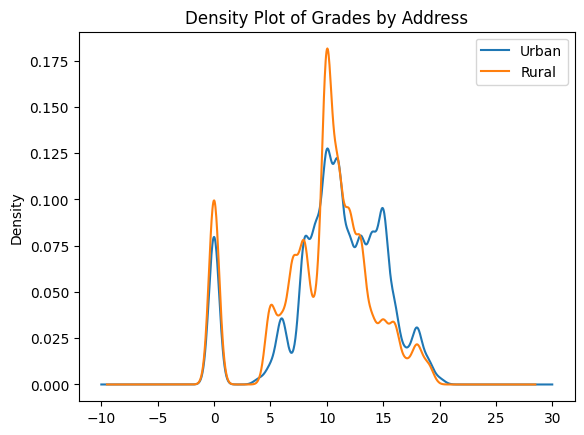

In [ ]:
# creating kernel plots of grades vs. address (urban / rural)

grade_urban = stud_data.loc[stud_data['address'] == "U", 'G3']
grade_rural = stud_data.loc[stud_data['address'] == "R", 'G3']

grade_urban.plot.density(bw_method = 0.1, label = "Urban",
                                  title = "Density Plot of Grades by Address")
grade_rural.plot.density(bw_method = 0.1, label = "Rural")
plt.legend()
plt.show()

**What's Interesting:**
This plot shows that there isn't a huge discrepancy in grades between urban and rural students. That is not what I expected.

<Axes: title={'center': 'G3'}, xlabel='sexC'>

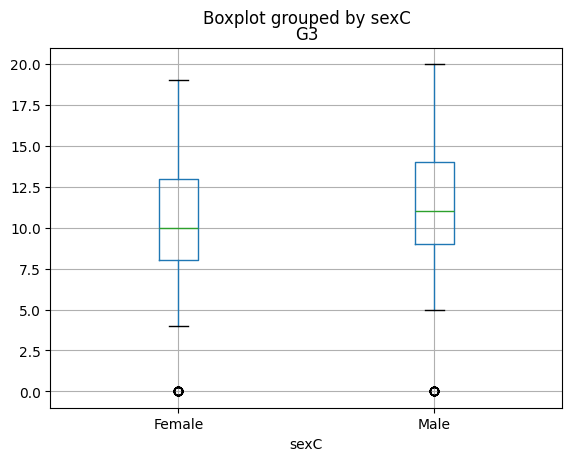

In [ ]:
stud_data.boxplot(column = ["G3"], by = "sexC")

**What's Interesting:**
Male students in this study on average have higher grades than female students. That is not what I would expect since they studied less.


Scatter plots:

• Create two scatterplots relating G3 to other numeric variables (G3 on the y-axis). Color the points by a categorical variable in each. Add appropriate labels and titles.



<Axes: title={'center': 'Absences vs. Grade'}, xlabel='absences', ylabel='G3'>

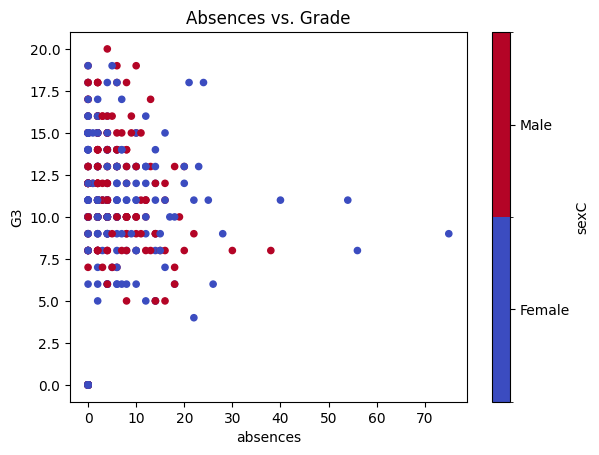

In [ ]:


stud_data.plot.scatter(x = "absences", y = "G3",c= "sexC", cmap = "coolwarm",title = "Absences vs. Grade")


**What's interesting:**
It looks like there is 1 outlier (0 absences, 0 Grade).  The others are mostly as expected, but a few high achievers have substantial absences. This maybe should be in a log scale?

<Axes: title={'center': 'Age vs. Final Grade'}, xlabel='age', ylabel='G3'>

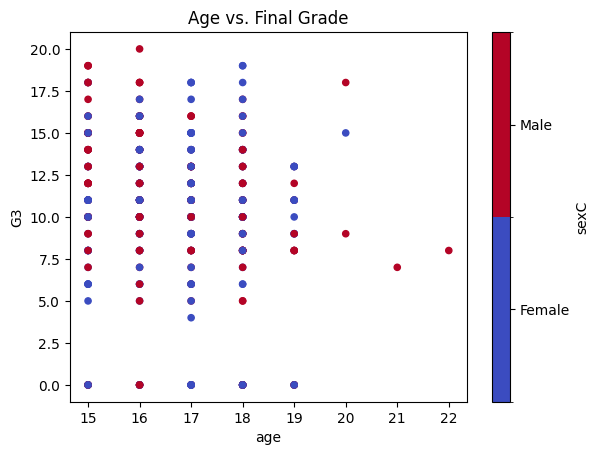

In [ ]:
stud_data.plot.scatter(x = "age", y = "G3",c= "sexC", cmap = "coolwarm",title = "Age vs. Final Grade")


**What's interesting**: Here we see that there are multiple outliers (0 absences, 0 Grade). There are also some very old students!

# **Plotting the NFL Data**

**Task 1**: Read in the data

• You can either read this dataset from the URL or download it and read it in locally. Check out the
first few observations of the data.

• Convert the homeTeam, awayTeam, day, stadium, startTime, toss, roof, and surface to category
type variables.


In [ ]:
import pandas as pd

# Read in NFL data
NFL_data = pd.read_csv("https://www4.stat.ncsu.edu/online/datasets/scoresFull.csv", sep=",")
NFL_data.info()

# Converting to categorical data
NFL_data["homeTeamC"]=NFL_data.homeTeam.astype("category")
NFL_data["awayTeamC"]=NFL_data.awayTeam.astype("category")
NFL_data["dayC"]=NFL_data.day.astype("category")
NFL_data["stadiumC"]=NFL_data.stadium.astype("category")
NFL_data["tossC"]=NFL_data.toss.astype("category")
NFL_data["roofC"]=NFL_data.roof.astype("category")
NFL_data["surfaceC"]=NFL_data.surface.astype("category")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3471 entries, 0 to 3470
Data columns (total 89 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   week             3328 non-null   float64 
 1   date             3471 non-null   object  
 2   day              3471 non-null   object  
 3   season           3471 non-null   int64   
 4   awayTeam         3471 non-null   object  
 5   AQ1              3471 non-null   int64   
 6   AQ2              3471 non-null   int64   
 7   AQ3              3471 non-null   int64   
 8   AQ4              3471 non-null   int64   
 9   AOT              3471 non-null   int64   
 10  AOT2             3471 non-null   int64   
 11  AFinal           3471 non-null   int64   
 12  homeTeam         3471 non-null   object  
 13  HQ1              3471 non-null   int64   
 14  HQ2              3471 non-null   int64   
 15  HQ3              3471 non-null   int64   
 16  HQ4              3471 non-null   int64   


**Task 2:** **Summarize the data**

• I want you to look at some trends during the regular season. This means you should remove any data
where the week is not 1 through 17.

In [ ]:
# I used AI for this. I needed help converting to numbers
NFL_data['week'] = pd.to_numeric(NFL_data['week'], errors='coerce')

# Filter for weeks between 1 and 17, and drop rows where 'week' is NaN
NFLreg_data = NFL_data[NFL_data['week'].between(1, 17, inclusive='both')].dropna(subset=['week'])

# Convert 'week' to integer type after handling non-finite values
NFLreg_data['week'] = NFLreg_data['week'].astype(int)

# sanity check
NFLreg_data.info()
len(NFLreg_data)
len(NFL_data)

<class 'pandas.core.frame.DataFrame'>
Index: 3328 entries, 0 to 3459
Data columns (total 89 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   week             3328 non-null   int64   
 1   date             3328 non-null   object  
 2   day              3328 non-null   object  
 3   season           3328 non-null   int64   
 4   awayTeam         3328 non-null   object  
 5   AQ1              3328 non-null   int64   
 6   AQ2              3328 non-null   int64   
 7   AQ3              3328 non-null   int64   
 8   AQ4              3328 non-null   int64   
 9   AOT              3328 non-null   int64   
 10  AOT2             3328 non-null   int64   
 11  AFinal           3328 non-null   int64   
 12  homeTeam         3328 non-null   object  
 13  HQ1              3328 non-null   int64   
 14  HQ2              3328 non-null   int64   
 15  HQ3              3328 non-null   int64   
 16  HQ4              3328 non-null   int64   
 17  

3471


• You should summarize some of the variables grouped by season and week, season alone, and week alone
(three different scenarios).

– Produce some common numeric summaries of variables across these different groups.

– Similarly, produce some common plots over time (mostly line plots I’d think!)


<Axes: title={'center': 'Average Points, Turnovers, and Yards per Week'}, xlabel='Week'>

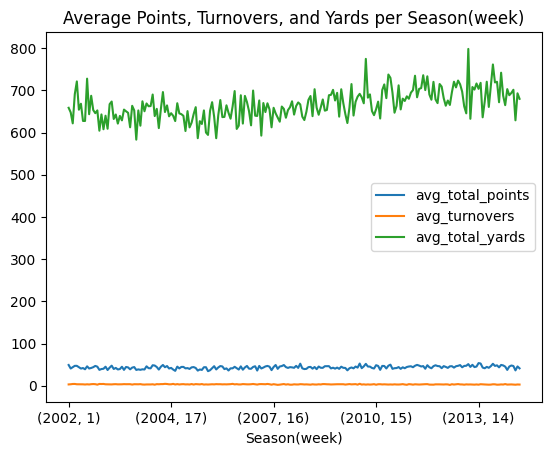

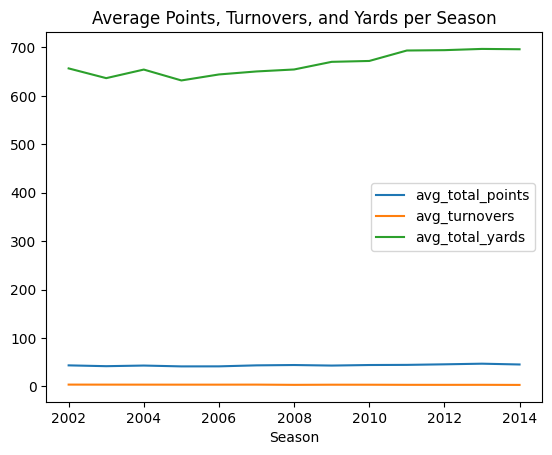

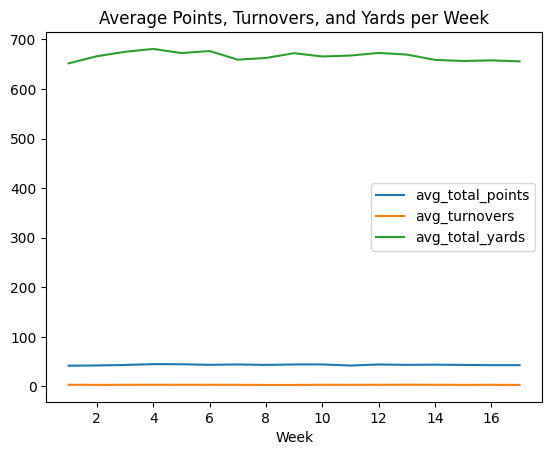

In [88]:
# playing around with the data to produce some summary stats

import pandas as pd
import matplotlib.pyplot as plt

# NFLreg_data.describe()

# Create some summary stats
NFLreg_data['total_points'] = NFLreg_data['AFinal'] + NFLreg_data['HFinal']
NFLreg_data['abs_margin'] = abs(NFLreg_data['AFinal'] - NFLreg_data['HFinal'])
NFLreg_data['total_yards'] = NFLreg_data['AtotalYds'] + NFLreg_data['HtotalYds']
NFLreg_data['total_turnovers'] = NFLreg_data['Aturnovers'] + NFLreg_data['Hturnovers']

#grouped by season and week
sum_season_week = (NFLreg_data \
                    .groupby(["season", "week"]) \
                    .agg(
                        games=("AFinal", "count"),
                        avg_total_points=("total_points", "mean"),
                        avg_margin=("abs_margin", "mean"),
                        avg_total_yards=("total_yards", "mean"),
                        avg_turnovers=("total_turnovers", "mean")
                    ))

# plot some of them
sum_season_week[['avg_total_points', 'avg_turnovers', 'avg_total_yards']].plot(
    xlabel="Season(week)",
    title="Average Points, Turnovers, and Yards per Season(week)"
)

#grouped by season
sum_season = (NFLreg_data \
                    .groupby(["season"]) \
                    .agg(
                        games=("AFinal", "count"),
                        avg_total_points=("total_points", "mean"),
                        avg_margin=("abs_margin", "mean"),
                        avg_total_yards=("total_yards", "mean"),
                        avg_turnovers=("total_turnovers", "mean")
                    ))
sum_season[['avg_total_points', 'avg_turnovers', 'avg_total_yards']].plot(
    xlabel="Season",
    title="Average Points, Turnovers, and Yards per Season"
)

#grouped by week
sum_week = (NFLreg_data \
                    .groupby(["week"]) \
                    .agg(
                        games=("AFinal", "count"),
                        avg_total_points=("total_points", "mean"),
                        avg_margin=("abs_margin", "mean"),
                        avg_total_yards=("total_yards", "mean"),
                        avg_turnovers=("total_turnovers", "mean")
                    ))
sum_week[['avg_total_points', 'avg_turnovers', 'avg_total_yards']].plot(
    xlabel="Week",
    title="Average Points, Turnovers, and Yards per Week"
)



**Why it's interesting:**

Not that iinteresting. Just practicing.

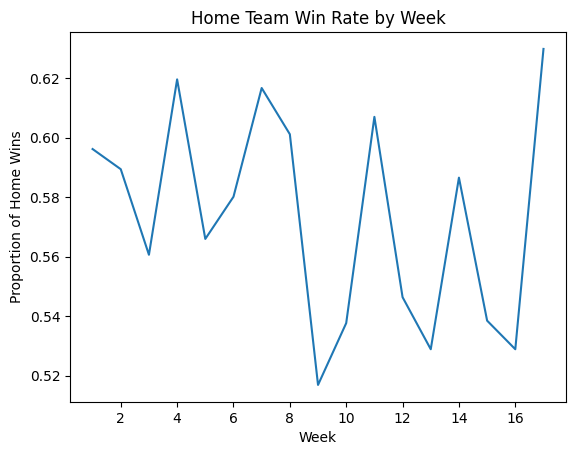

In [89]:
# tired of typing the long name
df = NFLreg_data

# looking at wins and losses
df["home_win"] = (df["HFinal"] > df["AFinal"]).astype(int)
df["away_win"] = (df["AFinal"] > df["HFinal"]).astype(int)

home_win_week = (
    df.groupby("week")["home_win"]
      .mean()
)

home_win_week.plot(
    title="Home Team Win Rate by Week",
    xlabel="Week",
    ylabel="Proportion of Home Wins"
)

plt.show()



**Why it's interesting**

It clearly shows the home team advantage.

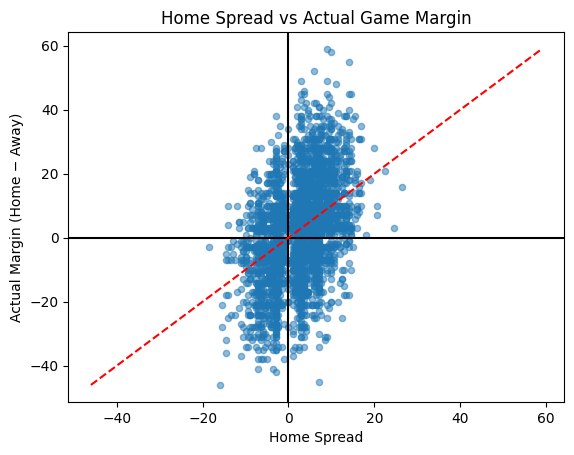

In [90]:
#looking at home spread vs. actual home winning

# plotting scatter of home spread vs. actual

df.plot.scatter(
    x="homeSpread",
    y="HminusAScore",
    title="Home Spread vs Actual Game Margin",
    alpha = 0.5
)

lims = [
    min(df["homeSpread"].min(), df["HminusAScore"].min()),
    max(df["homeSpread"].max(), df["HminusAScore"].max())
]
plt.axhline(0, color = 'black')
plt.axvline(0, color = 'black')
plt.plot(lims, lims, color="red", linestyle="--", label="Perfect Prediction")
plt.xlabel("Home Spread")
plt.ylabel("Actual Margin (Home − Away)")
plt.show()

**Why it's interesting:**

I like this scatter because it does show the home team advantage. There would probbly be better ways to look at this.

• Write at least one function that can be used to easily create a plot for this data.

– For instance, you might have a function that takes in a numeric variable and a statistic (or a
categorical variable, etc.). Then the function plots the average (or some other statistic) of the
numeric variable across the seasons.

– Add in type hints for the inputs (pd.DataFrame was one I used) using annotations in the function
definition.

– Don’t worry about type hinting the output. If you are interested, something like this could
work. . .




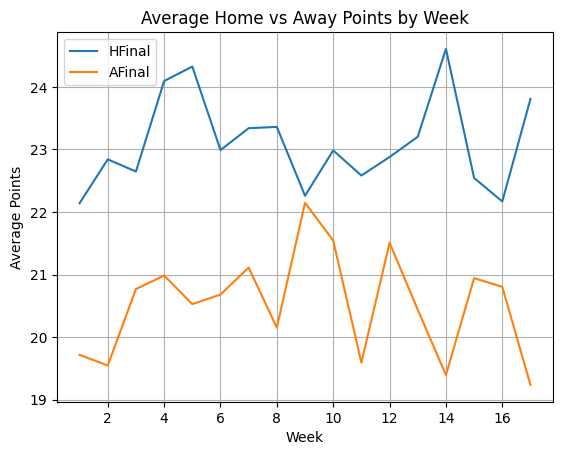

In [92]:
# Writing a function

import pandas as pd
import matplotlib.pyplot as plt

# Group by week and take average
weekly_scores = df.groupby("week")[["HFinal", "AFinal"]].mean()

# Line plot
weekly_scores.plot(
    title="Average Home vs Away Points by Week"
)
plt.xlabel("Week")
plt.ylabel("Average Points")
plt.grid(True)
plt.show()



**Why It's Interesting:**

Again it shows that teams score more points on average at home.

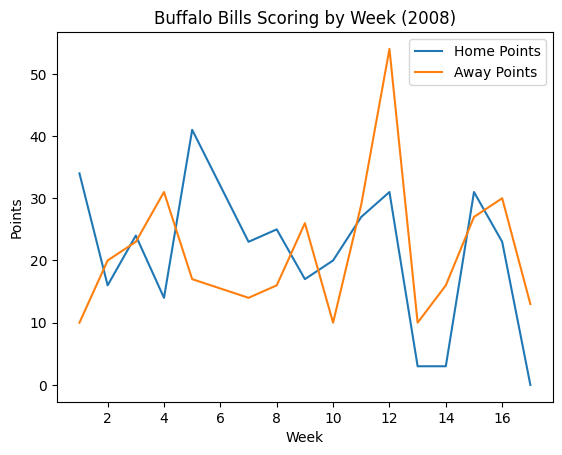

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_team_scores(team_name: str, season_year: int, df: pd.DataFrame) -> None:
    """
    Plots HFinal and AFinal for a given team and season.
    """
    # Filter for the season and games involving the team
    team_games = df[(df["season"] == season_year) &
                    ((df["homeTeam"] == team_name) | (df["awayTeam"] == team_name))].copy()

    # Plot HFinal and AFinal by week
    plt.plot(team_games["week"], team_games["HFinal"], label='Home Points')
    plt.plot(team_games["week"], team_games["AFinal"], label='Away Points')

    plt.title(f"{team_name} Scoring by Week ({season_year})")
    plt.xlabel("Week")
    plt.ylabel("Points")

    # Only create x-ticks if week column is not empty or NaN
    weeks = team_games["week"].dropna().astype(int)

    plt.legend()
    plt.show()

# listing team names
list(df.homeTeam.unique())

plot_team_scores("Buffalo Bills", 2008, df)

**Why It's Interesting**

The Bills had an amazing scoring game at week 11.

– Add the timeit decorator used in the class notes as well so information is printed out about how
long the code took to run.

– Run this function with three different settings of inputs (to obtain three different graphs of the
same type - or whatever it is your function does!)

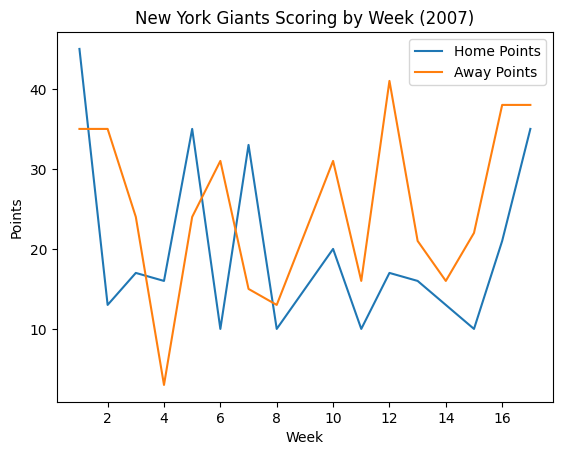

plot_team_scores ran in 0.211163 seconds


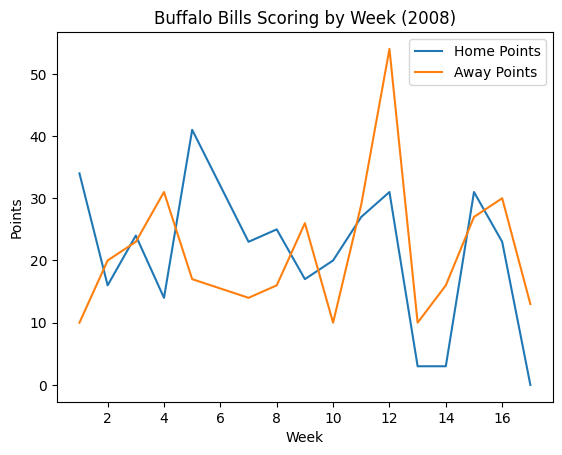

plot_team_scores ran in 0.219918 seconds


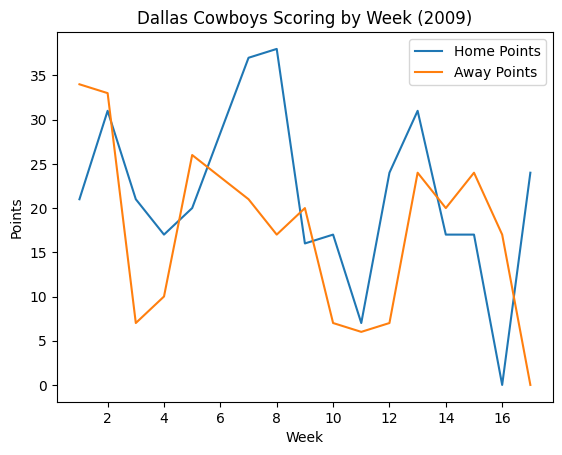

plot_team_scores ran in 0.224095 seconds


In [99]:

import time
from functools import wraps

# using the class timeit function
def timeit(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start = time.perf_counter()
        result = func(*args, **kwargs)
        end = time.perf_counter()
        elapsed = end - start
        print(f"{func.__name__} ran in {elapsed:.6f} seconds")
        return result
    return wrapper

# using the same function as before wrapped in a timeit counter

@timeit
def plot_team_scores(team_name: str, season_year: int, df: pd.DataFrame) -> None:
    """
    Plots HFinal and AFinal for a given team and season.
    """
    # Filter for the season and games involving the team
    team_games = df[(df["season"] == season_year) &
                    ((df["homeTeam"] == team_name) | (df["awayTeam"] == team_name))].copy()

    # Plot HFinal and AFinal by week
    plt.plot(team_games["week"], team_games["HFinal"], label='Home Points')
    plt.plot(team_games["week"], team_games["AFinal"], label='Away Points')

    plt.title(f"{team_name} Scoring by Week ({season_year})")
    plt.xlabel("Week")
    plt.ylabel("Points")

    # Only create x-ticks if week column is not empty or NaN
    weeks = team_games["week"].dropna().astype(int)

    plt.legend()
    plt.show()


plot_team_scores("New York Giants", 2007, df)
plot_team_scores("Buffalo Bills", 2008, df)
plot_team_scores("Dallas Cowboys", 2009, df)

** Why They're interesting **

NY scores the same either home or away.

The Bills had an amazing away game at week 11.

Dallas scored a lot at home but were held to 0 in a game at week 16.
